# Découverte de la base de données

##  Analyse exploratoire de la base de données

In [13]:
#Importation des librairies
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
#Importation de la base de données
df = pd.read_csv("train.csv", sep=",")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [14]:
#Vérifier si l'on a des valaurs manquantes

df.isna ()

,id,Genre,Age,Permis_Conduire,Region,Previously_Insured,Age_Vehicule,Vehicule_Sinistre,Prime_Annuelle,Canal_Contact,Anciennete,Reponse
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna ().any()

id                    False
Genre                 False
Age                   False
Permis_Conduire       False
Region                False
Previously_Insured    False
Age_Vehicule          False
Vehicule_Sinistre     False
Prime_Annuelle        False
Canal_Contact         False
Anciennete            False
Reponse               False
dtype: bool

In [16]:
df.isna ().any().any()

False

In [22]:
#Pour voir le type de variables lors de l'importation et corriger les types en cas de besoin

df.dtypes

id                      int64
Genre                  object
Age                     int64
Permis_Conduire         int64
Region                float64
Previously_Insured      int64
Age_Vehicule           object
Vehicule_Sinistre      object
Prime_Annuelle        float64
Canal_Contact         float64
Anciennete              int64
Reponse                 int64
dtype: object

In [4]:
#Renommons le nom des variables 

df.rename(columns={"Gender":"Genre", "Driving_License":"Permis_Conduire", "Region_Code":"Region",
                  "Vehicle_Age":"Age_Vehicule","Vehicle_Damage":"Vehicule_Sinistre","Annual_Premium":"Prime_Annuelle",
                  "Policy_Sales_Channel":"Canal_Contact", "Vintage":"Anciennete", "Response":"Reponse"} , inplace=True)
df

,id,Genre,Age,Permis_Conduire,Region,Previously_Insured,Age_Vehicule,Vehicule_Sinistre,Prime_Annuelle,Canal_Contact,Anciennete,Reponse
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
#Pour vérifier le nombre de valeurs différentes dans les variables


df.nunique().sort_values

<bound method Series.sort_values of id                    381109
Genre                      2
Age                       66
Permis_Conduire            2
Region                    53
Previously_Insured         2
Age_Vehicule               3
Vehicule_Sinistre          2
Prime_Annuelle         48838
Canal_Contact            155
Anciennete               290
Reponse                    2
dtype: int64>

In [9]:
#Permet de compter le nombre d'observations par groupe dans la variable genre 

df.Genre.value_counts()

Male      206089
Female    175020
Name: Genre, dtype: int64

In [14]:

df.Prime_Annuelle.describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Prime_Annuelle, dtype: float64

In [15]:
df.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [16]:
df.Anciennete.describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Anciennete, dtype: float64

In [114]:
df["Reponse"]=df["Reponse"].astype("category")
df.Reponse.value_counts(normalize=True).apply(lambda x: "{0:.0f}%".format(100*x))



0    88%
1    12%
Name: Reponse, dtype: object

In [21]:
df.Age_Vehicule.value_counts()



1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Age_Vehicule, dtype: int64

In [24]:
df.Vehicule_Sinistre.value_counts()



Yes    192413
No     188696
Name: Vehicule_Sinistre, dtype: int64

In [25]:
df.Permis_Conduire.value_counts()



1    380297
0       812
Name: Permis_Conduire, dtype: int64

In [26]:
df.Previously_Insured.value_counts()



0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [164]:
df.Canal_Contact.value_counts().sort_values(ascending=False)


152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
123         1
149         1
41          1
43          1
84          1
Name: Canal_Contact, Length: 155, dtype: int64

In [149]:
df.Region.value_counts().sort_values()

51       183
52       267
42       591
44       808
1       1008
5       1279
40      1295
22      1309
19      1535
34      1664
4       1801
49      1832
20      1935
23      1960
31      1960
16      2007
0       2021
38      2026
24      2415
25      2503
26      2587
17      2617
43      2639
32      2787
27      2823
9       3101
12      3198
7       3279
13      4036
2       4038
21      4266
10      4374
39      4644
14      4678
48      4681
18      5153
37      5501
45      5605
6       6280
35      6942
47      7436
33      7654
36      8797
11      9232
3       9251
50     10243
29     11065
30     12191
15     13308
41     18263
46     19749
8      33877
28    106415
Name: Region, dtype: int64

In [31]:
pd.crosstab(df["Previously_Insured"],df["Age_Vehicule"])



Age_Vehicule,1-2 Year,< 1 Year,> 2 Years
Previously_Insured,,,
0,134991,55529,15961
1,65325,109257,46


In [38]:
pd.crosstab(df["Vehicule_Sinistre"], df["Age_Vehicule"])




Age_Vehicule,1-2 Year,< 1 Year,> 2 Years
Vehicule_Sinistre,,,
No,72091,116590,15
Yes,128225,48196,15992


In [40]:
pd.crosstab(df["Vehicule_Sinistre"], df["Age_Vehicule"], normalize="columns").applymap(lambda x: "{0:.0f}%".format(100*x))



Age_Vehicule,1-2 Year,< 1 Year,> 2 Years
Vehicule_Sinistre,,,
No,36%,71%,0%
Yes,64%,29%,100%


In [34]:
pd.crosstab(df["Previously_Insured"], df["Age_Vehicule"])

Age_Vehicule,1-2 Year,< 1 Year,> 2 Years
Previously_Insured,,,
0,134991,55529,15961
1,65325,109257,46


In [41]:
pd.crosstab(df["Previously_Insured"], df["Vehicule_Sinistre"])



Vehicule_Sinistre,No,Yes
Previously_Insured,,
0,23990,182491
1,164706,9922


In [42]:
pd.crosstab(df["Genre"], df["Vehicule_Sinistre"])

Vehicule_Sinistre,No,Yes
Genre,,
Female,95355,79665
Male,93341,112748


In [5]:
pd.crosstab(df["Reponse"], df["Previously_Insured"])

Previously_Insured,0,1
Reponse,,
0,159929,174470
1,46552,158


In [48]:
pd.crosstab(df["Genre"], df["Vehicule_Sinistre"], normalize="index").applymap(lambda x: "{0:.0f}%".format(100*x))



Vehicule_Sinistre,No,Yes
Genre,,
Female,54%,46%
Male,45%,55%


In [57]:
df.groupby("Genre")["Age"].agg(["mean","std","min", "max", "median"])

,mean,std,min,max,median
Genre,,,,,
Female,36.372746,15.223969,20,85,30
Male,40.903095,15.449718,20,85,41


In [69]:
pd.crosstab(df["Genre"], df["Vehicule_Sinistre"], values=df["Age"], aggfunc=("mean","std"))

mean                   std           
Vehicule_Sinistre         No        Yes         No        Yes
Genre                                                        
Female             32.552441  40.945459  13.872942  15.506316
Male               36.756484  44.335962  15.555624  14.489925

In [84]:
df["Region"]=df["Region"].astype("int")
df["Canal_Contact"]=df["Canal_Contact"].astype("int")
df.dtypes



id                      int64
Genre                  object
Age                     int64
Permis_Conduire         int64
Region                  int32
Previously_Insured      int64
Age_Vehicule           object
Vehicule_Sinistre      object
Prime_Annuelle        float64
Canal_Contact           int32
Anciennete              int64
Reponse                 int64
dtype: object

## Data Visualisation

<AxesSubplot:xlabel='Age', ylabel='Prime_Annuelle'>

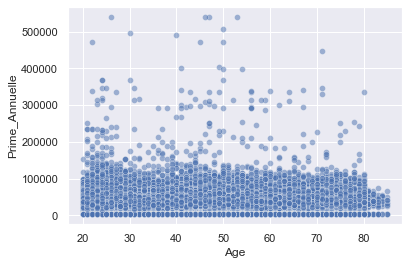

In [95]:
sns.set_theme(style="darkgrid")

sns.scatterplot(data=df, x="Age", y="Prime_Annuelle", alpha=0.5)


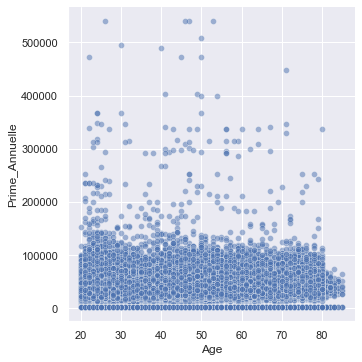

In [97]:
sns.relplot(data=df, x="Age", y="Prime_Annuelle", alpha=.5)

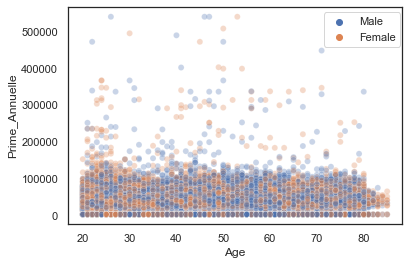

In [166]:
sns.set_theme(style="white")

sns.scatterplot(data=df, x="Age", y="Prime_Annuelle", hue="Genre", alpha=0.3)
plt.legend(bbox_to_anchor=(1.01, 1), loc=0)



<AxesSubplot:xlabel='Vehicule_Sinistre', ylabel='Prime_Annuelle'>

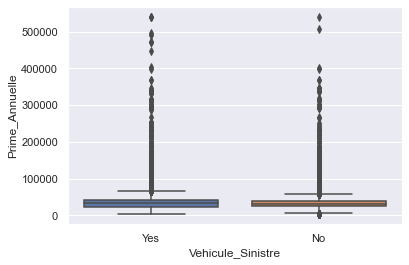

In [167]:
sns.set_theme(style="darkgrid")
sns.boxplot(data=df, x="Vehicule_Sinistre", y="Prime_Annuelle")



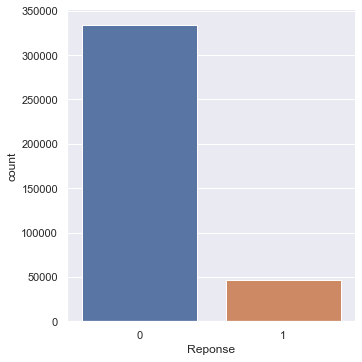

In [144]:
sns.catplot(data=df, x="Reponse", kind="count")



<AxesSubplot:xlabel='Age', ylabel='Density'>

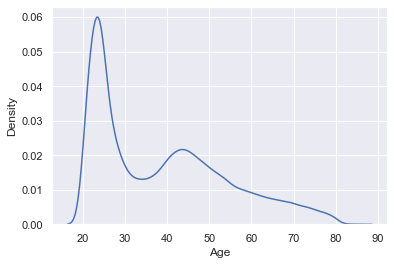

In [140]:
sns.kdeplot(data=df, x="Age")

#Distribution de l'age

<AxesSubplot:xlabel='Reponse', ylabel='Prime_Annuelle'>

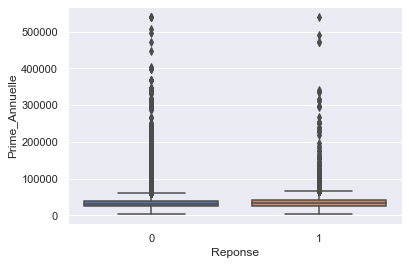

In [136]:
sns.set_theme(style="darkgrid")
sns.boxplot(data=df, x="Reponse", y="Prime_Annuelle")



<AxesSubplot:xlabel='Reponse', ylabel='Age'>

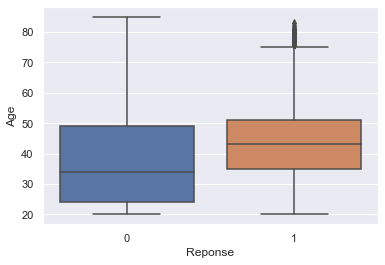

In [137]:
sns.boxplot(data=df, x="Reponse", y="Age")


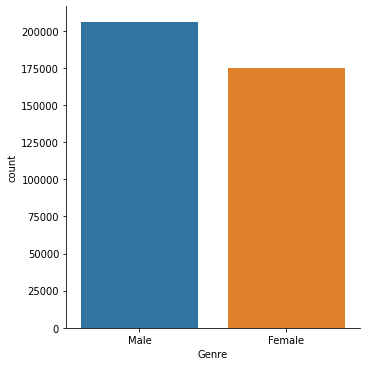

In [20]:
sns.catplot(data=df, x="Genre", kind="count")

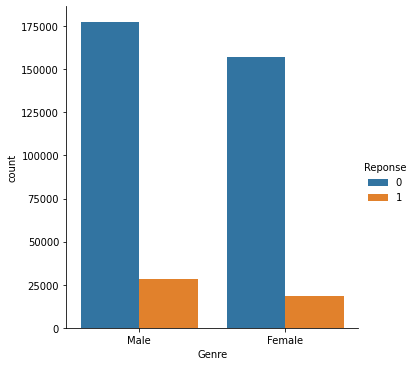

In [19]:

sns.catplot(data=df, x="Genre", hue="Reponse", kind="count")

<Figure size 3600x432 with 0 Axes>

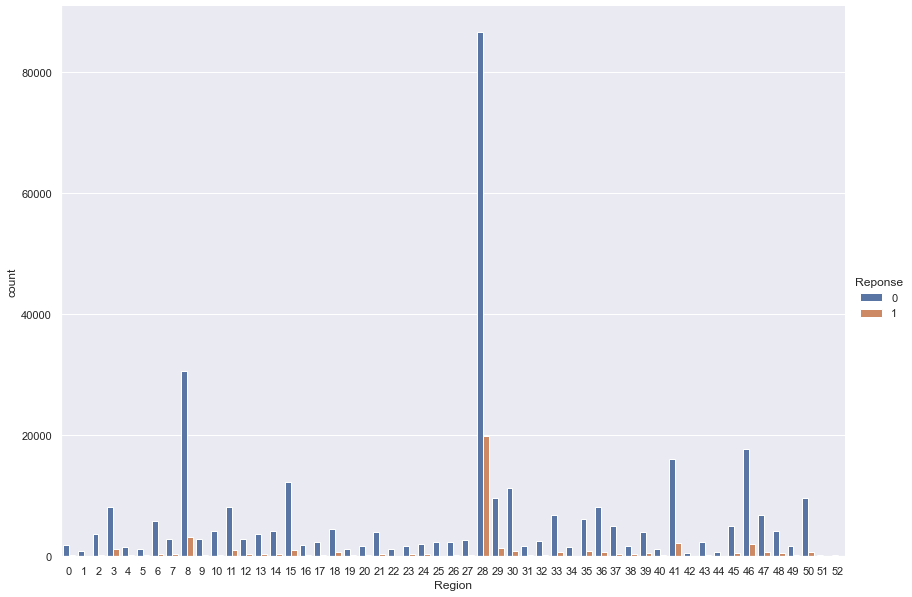

In [157]:

sns.catplot(data=df, x="Region", hue="Reponse", kind="count",height=8.27, aspect=11.7/8.2)

In [9]:
a = pd.crosstab(df["Region"], df["Reponse"])

In [22]:
#Test d'indépendance entre Region et Reponse

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(a)

st_chi2, st_p, st_dof


(7267.842468803051, 0.0, 52)

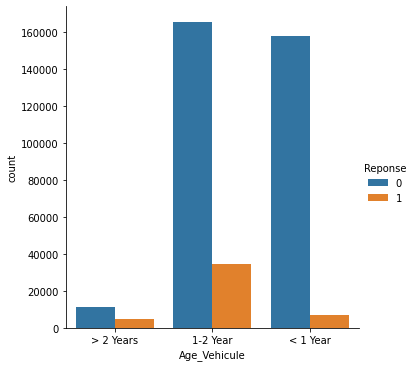

In [6]:
sns.catplot(data=df, x="Age_Vehicule", hue="Reponse", kind="count")

In [23]:
b = pd.crosstab(df["Age_Vehicule"], df["Reponse"])

In [24]:
#Test d'indépendance entre Age du véhicule et Reponse

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(b)

st_chi2, st_p, st_dof


(18771.889904151052, 0.0, 2)

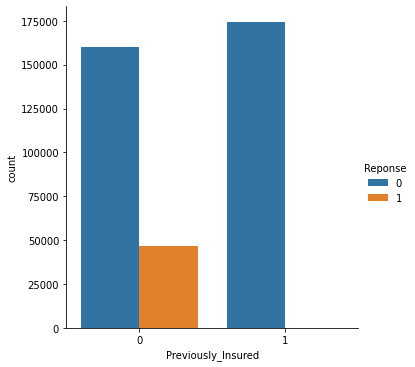

In [21]:
sns.catplot(data=df, x="Previously_Insured", hue="Reponse", kind="count")

In [25]:
c = pd.crosstab(df["Reponse"], df["Canal_Contact"])

In [26]:
#Test d'indépendance entre le canal de contact et Reponse

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(c)

st_chi2, st_p, st_dof


(26447.0328567449, 0.0, 154)

In [10]:
#Corrélation de spearman

df.corr(method="spearman")

,id,Age,Permis_Conduire,Region,Previously_Insured,Prime_Annuelle,Canal_Contact,Anciennete,Reponse
id,1.000000,0.000963,-0.000564,-0.000155,0.002457,0.002897,-0.002363,-0.000630,-0.001368
Age,0.000963,1.000000,-0.064802,0.012923,-0.268065,0.099440,-0.648227,-0.001618,0.144360
Permis_Conduire,-0.000564,-0.064802,1.000000,0.000533,0.014969,-0.013822,0.045131,-0.000852,0.010155
Region,-0.000155,0.012923,0.000533,1.000000,-0.003932,-0.036529,-0.014842,-0.002883,0.001202
Previously_Insured,0.002457,-0.268065,0.014969,-0.003932,1.000000,-0.029522,0.208324,0.002537,-0.341170
Prime_Annuelle,0.002897,0.099440,-0.013822,-0.036529,-0.029522,1.000000,-0.197696,-0.000143,0.033991
Canal_Contact,-0.002363,-0.648227,0.045131,-0.014842,0.208324,-0.197696,1.000000,0.000195,-0.137229
Anciennete,-0.000630,-0.001618,-0.000852,-0.002883,0.002537,-0.000143,0.000195,1.000000,-0.001051
Reponse,-0.001368,0.144360,0.010155,0.001202,-0.341170,0.033991,-0.137229,-0.001051,1.000000
